# Alpha Advantage Data Extraction

Let's extract data from Alpha Advantage API.

The documentation of API is on this link, https://www.alphavantage.co/documentation/

First thing first, we need to obtain an API key. To do that, please visit this link: (https://www.alphavantage.co/support/#api-key) and follow the instructions.

# 1. Using Wrapper in Python

In [1]:
#install wrapper for alpha vantage
#!pip install alpha_vantage

In [9]:
#install libraries
import requests
from alpha_vantage.timeseries import TimeSeries
import json
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
#provide api key
api_key = 'GO6YECDUJU1FWBJ3'

Acquiring data from alpha vantage's wrapper in python.
We need to know the symbol of company, to know it, just google using this keyword '{company_name} stock'.

There are some examples of the company code, as below:
GOOGL = Google
MSFT = Microsoft
AAPL = Apple

### Let's try to get data for Google's stock with 60 minutes interval

In [11]:
#call the wrapper and extract the data into dataframe
ts = TimeSeries(key=api_key, output_format='pandas')
data, meta_data = ts.get_intraday(symbol='GOOGL', interval='60min', outputsize='full')
print(data)

                       1. open    2. high     3. low   4. close  5. volume
date                                                                      
2019-06-25 09:30:00  1115.1266  1116.7733  1098.0353  1100.1560   309103.0
2019-06-25 10:30:00  1099.6650  1100.7087  1089.3376  1094.3148   232093.0
2019-06-25 11:30:00  1095.7300  1098.0000  1094.9301  1096.0800   128663.0
2019-06-25 12:30:00  1096.0588  1097.9329  1089.7950  1095.1588   166606.0
2019-06-25 13:30:00  1095.5500  1096.5500  1090.7250  1091.2600   113703.0
2019-06-25 14:30:00  1090.8700  1091.7100  1086.0000  1086.2700   159621.0
2019-06-25 15:30:00  1087.0191  1089.9316  1085.6075  1088.0192   267017.0
2019-06-26 09:30:00  1091.0437  1096.1691  1086.7401  1089.9437   378160.0
2019-06-26 10:30:00  1090.2000  1094.4000  1084.2700  1084.4200   189210.0
2019-06-26 11:30:00  1084.6620  1085.7711  1079.5150  1080.9572   176273.0
2019-06-26 12:30:00  1080.5699  1081.8400  1075.7150  1075.8101   149754.0
2019-06-26 13:30:00  1076

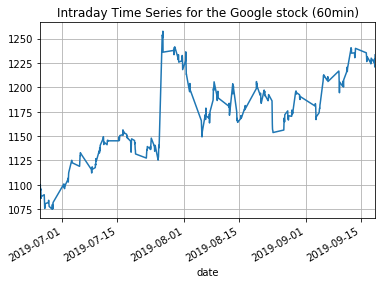

In [12]:
#visualize the result
data['4. close'].plot()
plt.title('Intraday Time Series for the Google stock (60min)')
plt.grid()
plt.show()

### Let's try to get data for Apple's stock with 5 minutes interval

In [13]:
#call the wrapper and extract the data into dataframe
ts = TimeSeries(key=api_key, output_format='pandas')
data, meta_data = ts.get_intraday(symbol='AAPL', interval='5min', outputsize='full')
print(data)

ValueError: Thank you for using Alpha Vantage! Our standard API call frequency is 5 calls per minute and 500 calls per day. Please visit https://www.alphavantage.co/premium/ if you would like to target a higher API call frequency.

In [ ]:
#visualize the result
data['4. close'].plot()
plt.title('Intraday Time Series for the Google stock (60min)')
plt.grid()
plt.show()

# 2. Obtaining data from Alpha Vantage API

This time, we call the API and load the data into python and store it into dataframe

In [14]:
#define the link
API_URL = 'https://www.alphavantage.co/query'

#create function to automatically extract the data
def extract_data(symbol, interval, API_URL, api_key):
    
    #define the parameters that are needed
    data = { "function": "TIME_SERIES_INTRADAY", 
            "symbol": symbol,
            "interval" : interval,       
            "datatype": "json", 
            "apikey": api_key} 
    
    #call the api and store into json format
    response = requests.get(API_URL, data) 
    data = response.json()
    data = data['Time Series (%s)' % (interval)]
    
    #store into dataframe
    df = pd.DataFrame.from_dict(data, orient='index')
    return df

### Let's try to get data for Apple's stock with 5 minutes interval

In [16]:
#extract to dataframe
aapl = extract_data('AAPL', '30min', API_URL, api_key)
aapl

,1. open,2. high,3. low,4. close,5. volume
2019-09-09 12:00:00,216.3800,216.3900,215.7600,216.3400,1117762
2019-09-09 12:30:00,216.3470,216.5905,213.5676,214.8069,1944949
2019-09-09 13:00:00,214.8000,215.2470,214.3400,215.1300,2007508
2019-09-09 13:30:00,215.1373,215.2000,214.1500,214.1700,914840
2019-09-09 14:00:00,214.1700,214.7400,213.8900,214.5700,1294903
2019-09-09 14:30:00,214.5700,214.5700,213.8700,214.0600,1262372
2019-09-09 15:00:00,214.0700,214.4400,214.0100,214.2900,989676
2019-09-09 15:30:00,214.2883,214.8700,214.1600,214.5468,1288263
2019-09-09 16:00:00,214.5500,214.5700,214.1500,214.1500,2318944
2019-09-10 10:00:00,214.2600,214.4200,211.9200,213.2200,3927550


### Let's try to get data for Microsoft's stock with 30 minutes interval

In [20]:
#extract to dataframe
msft = extract_data('BBCA.JK', '30min', API_URL, api_key)
msft

,1. open,2. high,3. low,4. close,5. volume
2019-09-05 23:30:00,30150.0000,30150.0000,30125.0000,30150.0000,880900
2019-09-06 00:00:00,30150.2500,30151.9300,30126.9300,30150.2500,405367
2019-09-06 03:00:00,30125.0000,30175.0000,30125.0000,30125.0000,4507700
2019-09-06 03:30:00,30150.0000,30225.0000,30125.0000,30150.0000,1365000
2019-09-06 04:00:00,30150.0000,30150.0000,30125.0000,30125.0000,1176300
2019-09-06 04:30:00,30125.0000,30150.0000,30125.0000,30150.0000,1526000
2019-09-08 22:00:00,30125.0000,30250.0000,29900.0000,29900.0000,1186400
2019-09-08 22:30:00,29925.0000,30050.0000,29900.0000,30000.0000,257300
2019-09-08 23:00:00,30000.0000,30150.0000,30000.0000,30100.0000,308500
2019-09-08 23:30:00,30125.0000,30175.0000,30125.0000,30150.0000,194300
